In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt

In [ ]:
# Load And Split DataSets

(train_images , train_labels) , (test_images , test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
#Normalize Pixel values to be between 0 and 1 .train_images , test_images = train_images/255.0 , test_images/255.0

In [ ]:
class_names = ['airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

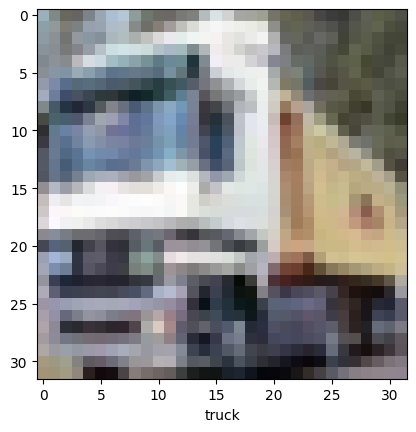

In [ ]:
# Let's look at a one image. We change this to look at other images(img_index = 1 , 2 , 3 ....)

IMG_INDEX = 1
plt.imshow(train_images[IMG_INDEX] , cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32 , (3,3) , activation = 'relu' , input_shape = (32 , 32 , 3)))
model.add(layers.MaxPooling2D((2,2)))  #This layer will perform the max pooling operation using 2x2 samples and a stride of 2 .
model.add(layers.Conv2D(64 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64 , (3,3) , activation = 'relu'))

In [ ]:
model.summary()   # Let's have a look at our model so far .

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [ ]:
model.add(layers.Flatten()) # We need to take these extracted features and add a way to classify them .
#  This is why we add the layers to our model .
model.add(layers.Dense(64 , activation = 'relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
# We can see the flatten layer changes the shape of our data so that we can feed it to the 64 nodes dense layer ,
# followed by the final output layer  , followed by the final output layer of 10 neurons (one for each class).

In [ ]:
#Now we will train and compile the model using the recommanded hyperparameters from tensorflow.

model.compile(optimizer = 'adam' , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) ,
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_images , train_labels , epochs = 10 , validation_data = (test_images , test_labels))

Epoch 1/10
1563/1563 [==============================] - 53s 33ms/step - loss: 1.5275 - accuracy: 0.4426 - val_loss: 1.2944 - val_accuracy: 0.5415
Epoch 2/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1546 - accuracy: 0.5915 - val_loss: 1.1022 - val_accuracy: 0.6049
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9991 - accuracy: 0.6492 - val_loss: 0.9529 - val_accuracy: 0.6639
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9056 - accuracy: 0.6840 - val_loss: 0.9223 - val_accuracy: 0.6759
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8295 - accuracy: 0.7104 - val_loss: 0.8914 - val_accuracy: 0.6906
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7734 - accuracy: 0.7288 - val_loss: 0.8791 - val_accuracy: 0.6947
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7196 - accuracy: 0.7499 - val_loss: 0.9091 -

In [ ]:
# Train on 50000 samples and validate on 10000 samples .

In [ ]:
#Evaluate the model ==> We can determine how well the model perfomed by looking at it's performance on the
# test data sets .

In [ ]:
test_loss , test_acc = model.evaluate(test_images , test_labels  ,verbose = 2 )
print(test_acc)

313/313 - 3s - loss: 0.9517 - accuracy: 0.6893 - 3s/epoch - 10ms/step
0.689300000667572


In [ ]:
#In this model we get our accuracy ~ 70% . This is okay but surely there is a way to improve
# on this by pretained model and fine tuning .

In [ ]:
# Pre-tained Models and Fine Tunning ==>

# A pre-trained model is a machine learning model that has been trained on a large dataset to perform a
# specific task,
# such as image classification, natural language processing, or speech recognition.
# These models are trained on powerful computing infrastructure and extensive labeled data, often using deep
#  learning techniques.
# The pre-training phase involves exposing the model to a large amount of data, allowing it to learn patterns,
# features, and representations
# that are useful for the given task.

#During pre-training, the model learns to extract relevant features from the input data
# and build internal representations that capture the underlying patterns. For example,
# in the case of an image classification model, the pre-trained model learns to recognize shapes, edges, and t
# extures in images.
# In the case of a natural language processing model, it learns to understand semantic relationships
#  between words and sentences.

#Fine-tuning, on the other hand, is a process where a pre-trained model is further trained on a smaller,
# task-specific dataset to adapt it to a particular problem or domain. Fine-tuning helps to transfer the
# knowledge gained during
# pre-training to a new, more specific task. Instead of training a model from scratch on the smaller dataset,
# fine-tuning takes advantage
# of the pre-trained model's already learned representations and refines them to fit the new task.

#The fine-tuning process typically involves three steps:

#(1). Initialization: The pre-trained model is loaded, and its parameters are frozen to preserve the learned representations.
# Only the final layers or specific parts of the model are modified or replaced to match the requirements of the new task.
# For example, in an image classification model, the last few layers responsible for predicting class labels are often replaced
# with new layers.

#(2). Training: The frozen parameters are then fine-tuned by training the modified model on the task-specific dataset.
# This involves feeding the new dataset through the model, computing the loss, and updating the model's parameters through backpropagation
# and gradient descent. The training process adjusts the model's parameters to optimize its performance for the specific task.

#(3). Fine-tuning allows for faster and more effective training on new tasks, especially when the available task-specific data is limited.
# By leveraging the knowledge encoded in the pre-trained model, fine-tuning can achieve better performance and faster convergence compared
# to training a model from scratch.

#In summary, a pre-trained model is a model trained on a large dataset for a specific task, while fine-tuning is the process of
# adapting the pre-trained model to a new task by modifying and training specific parts of the model on a smaller, task-specific dataset.

In [ ]:
#Now we will load the cats_vs_dogs dataset from the module tensorflow_datasets .
#This datasets contains(images , labels) pairs where images have different dimensions and 3 color channels .

In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [ ]:
#split the data  manually into 80% training and 10% testing and 10% validation .
(raw_train , raw_validation , raw_test) , metadata = tfds.load('cats_vs_dogs' , split = ['train[:80%]' ,
                                                                                         'train[80%:90%]' ,
                                                                                         'train[90%:]'] ,
                                                               with_info = True ,
                                                               as_supervised = True)

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
get_label_name = metadata.features['label'].int2str

In [ ]:
#The code you provided is accessing the int2str attribute of the 'label' feature in the metadata object. Let's break it down step by step:

#metadata: It refers to an object or structure that contains information about a dataset or the features of a machine learning model.

#metadata.features['label']: This accesses the 'label' feature within the features attribute of the metadata object.
#  The 'label' feature typically represents the target variable or the class labels in a classification task.

#.int2str: It is a function or attribute associated with the 'label' feature.
#  In this case, it indicates that the labels are encoded as integers and can be converted to their corresponding string representations.

#get_label_name: It is the variable that stores the reference to the int2str attribute, so it can be called later in the code to convert
#  integer labels to their string representations.

#To give you a concrete example, let's say you have a classification task where the labels are encoded as integers (e.g., 0, 1, 2),
# and you want to convert them to their string representations (e.g., 'cat', 'dog', 'bird'). By using the get_label_name function, you can
#  pass an integer label as an argument, and it will return the corresponding string label. For instance, get_label_name(1) would return 'dog'.

In [ ]:
import  matplotlib.pyplot as plt

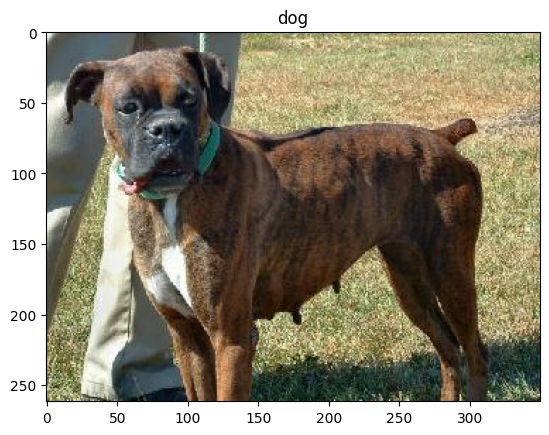

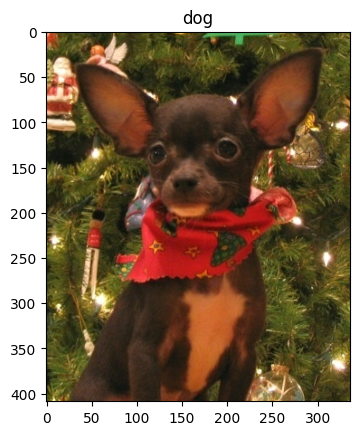

In [ ]:
#Create a function object that we can use to get labels .
# Display 2 images from the datasets .

for image , label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

# output ==> dog in different dimensions .

In [ ]:
IMG_SIZE = 160    # All images will be resized to 160x160 .

In [ ]:
import tensorflow as tf

In [ ]:
IMG_SIZE = 160    # All images will be resized to 160x160 .
def format_example(image , label):

  # return an image that is reshaped to IMG_SIZE

  image = tf.cast(image , tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image , (IMG_SIZE , IMG_SIZE))
  return image , label

# Now we can apply this function to all our images using map .
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

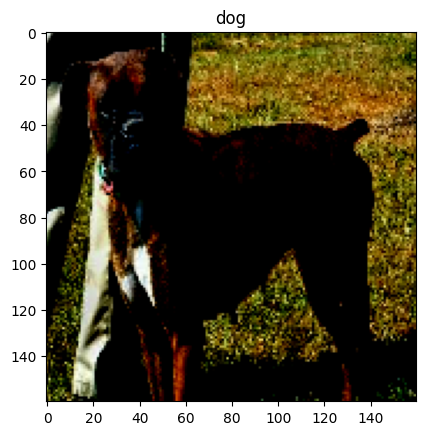

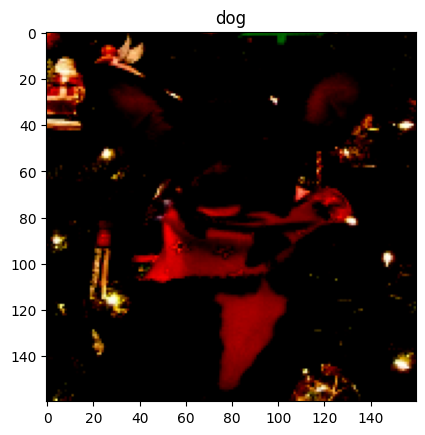

In [ ]:
# Let's have a look at our image now :
for image , label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))


In [ ]:
# Now if we look at the shape of an original image vs the new image we will see it has been changed .

In [ ]:
for img , label in raw_train.take(2):
  print("Original Shape:" , img.shape)

for img , label in train.take(2):
  print("New Shape:" , img.shape)

Original Shape: (262, 350, 3)
Original Shape: (409, 336, 3)
New Shape: (160, 160, 3)
New Shape: (160, 160, 3)


In [ ]:
# Picking a Pre-trained  Model ==>  The model we are going to use as the convolutional base for our model is
# the
# MobileNet V2 developed at google .
#  The model is trained on 1.4 million images and has 1000 different classes .
# We want to use this model but only its convolutional base .
# So , when we load in the model we will specify that we don't want to load the top (classfication)
# layer .
# We will tell the model what input shape to expect and to use the predetermined weights from
# imagenet(Google DataSet) .

In [ ]:
IMG_SIZE = 160 # Define the desired size for the input image

# Create the base model from the pre-trained model MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 160, 160, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 80, 80, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 80, 80, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 80, 80, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 80, 80, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 80, 80, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 80, 80, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 80, 80, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 80, 80, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 80, 80, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 81, 81, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 40, 40, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
# Freezing the Base ==>

# The term freezing refers to disabling the training property of a layer .
# It simply means we wont make any changes to the weights of any layers
# that are frozen during training .
# This is important as we don't want to change the convolutional lase that already  has  learned weights .

In [ ]:
base_model.trainable = False

In [ ]:
# The code base_model.trainable = False is used to set the trainable attribute of the base_model to False.

# In TensorFlow and Keras, the trainable attribute is a boolean flag that determines
#  whether the weights of a model or a specific layer
# within the model should be updated during training or not.
# When trainable is set to True, the weights of the model or layer can be updated based on
# the gradients computed during backpropagation. However, when trainable is set to False, the weights
# remain frozen, and their values are not updated during training.

# By setting base_model.trainable = False, you are essentially freezing the weights of the base_model
#  (in this case, the MobileNetV2 model) and preventing them from being updated when you train your
#  overall model.

# Freezing the weights of a pre-trained base model is a common practice in transfer
# learning. In transfer learning, you typically use a pre-trained model as a feature
#  extractor and add your own custom layers on top. By freezing the base model, you can
#   leverage the pre-trained weights as powerful feature extractors while only training
#   the weights of the custom layers that you added. This can be beneficial when you have
#   limited training data or when the pre-trained model has been trained on a similar task or dataset.
#   It helps prevent the loss of valuable learned features from the base model during the training of
#   the custom layers.

In [ ]:
# Adding our Classifier ==>
# Now that we have  our base layer setup we can add the classfier  .
# Instead of flattening the feature map of the base layer we will use a global average pooling
# layer  that will average the entire 5x5 area of  each 2D features map and
# return to us a single 1280 element vector per filter .

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
# Finally we will add the prediction layer that will be a single dense neuron .
# We can do this because we only have two classes to predicted for .

In [ ]:
prediction_layer = tf.keras.layers.Dense(1)

In [ ]:
# Now we will combine these layers together in a model .

model = tf.keras.Sequential([
    base_model ,
    global_average_layer ,
    prediction_layer
])

In [ ]:
input_shape = (160 , 160, 3)  # Example input shape, adjust as needed

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=input_shape),  # Add an input layer
    base_model,
    global_average_layer,
    prediction_layer
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = base_learning_rate) ,
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True) ,
              metrics = ['accuracy'])


# We can evaluate the model right now to see how it does before training it on our new images .

BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

initial_epochs = 3
validation_steps = 20
loss0 , accuracy0 = model.evaluate(validation_batches , steps = validation_steps)

20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 615ms/step - accuracy: 0.3654 - loss: 0.9588


In [ ]:
# Now we can train it on our images
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 241s 406ms/step - loss: 0.0711 - accuracy: 0.9720 - val_loss: 0.0460 - val_accuracy: 0.9819
Epoch 2/3
582/582 [==============================] - 238s 406ms/step - loss: 0.0426 - accuracy: 0.9841 - val_loss: 0.0436 - val_accuracy: 0.9850
Epoch 3/3
582/582 [==============================] - 246s 420ms/step - loss: 0.0386 - accuracy: 0.9854 - val_loss: 0.0424 - val_accuracy: 0.9858
[0.9720042943954468, 0.9840945601463318, 0.9853842258453369]
